# STEP 1: IMPORTING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
chicago_df_1 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv", error_bad_lines = False)
chicago_df_2 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", error_bad_lines = False)
chicago_df_3 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", error_bad_lines = False)
chicago_df_4 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", error_bad_lines = False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/Users/mac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [48]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3, chicago_df_4])

In [4]:
chicago_df.shape

(7941282, 23)

# STEP 2: EXPLORING THE DATASET

In [5]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [6]:
chicago_df.drop(["Unnamed: 0","Case Number", "ID", "IUCR", "X Coordinate", "Y Coordinate", "Updated On", "Year", "FBI Code", "Beat", "Ward", "Community Area", "Location", "District", "Latitude", "Longitude"], inplace = True, axis = 1)

In [7]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [9]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format= "%m/%d/%Y %I:%M:%S %p")

In [10]:
chicago_df.Date

0         2004-01-01 00:01:00
1         2003-03-01 00:00:00
2         2004-06-20 11:00:00
3         2004-12-30 20:00:00
4         2003-05-01 01:00:00
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 7941282, dtype: datetime64[ns]

In [11]:
chicago_df["Primary Type"].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [49]:
order_data = chicago_df["Primary Type"].value_counts().index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

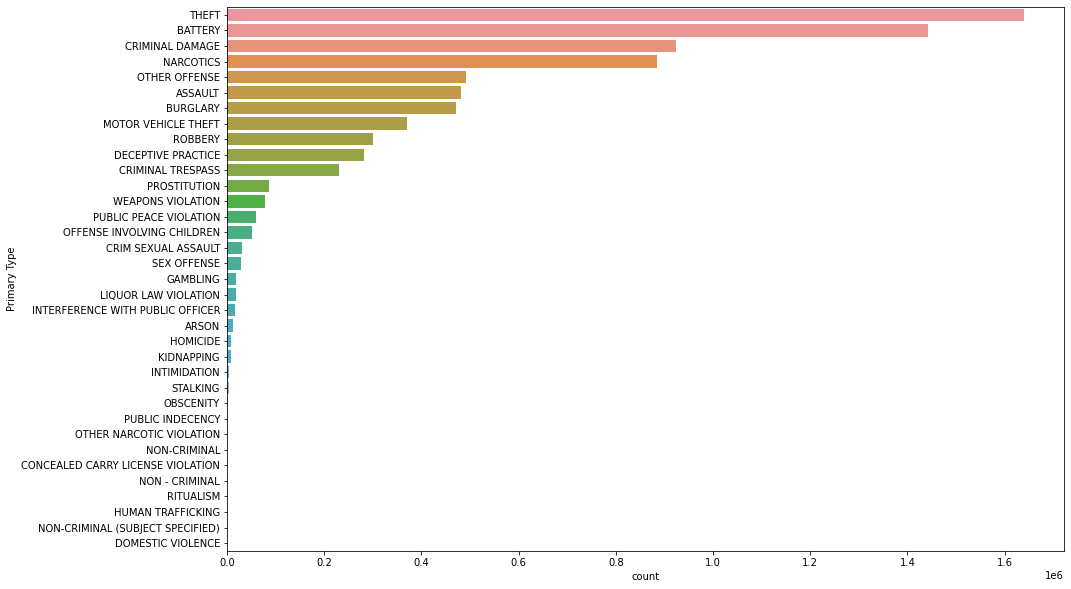

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(y= "Primary Type", data = chicago_df, order = order_data)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

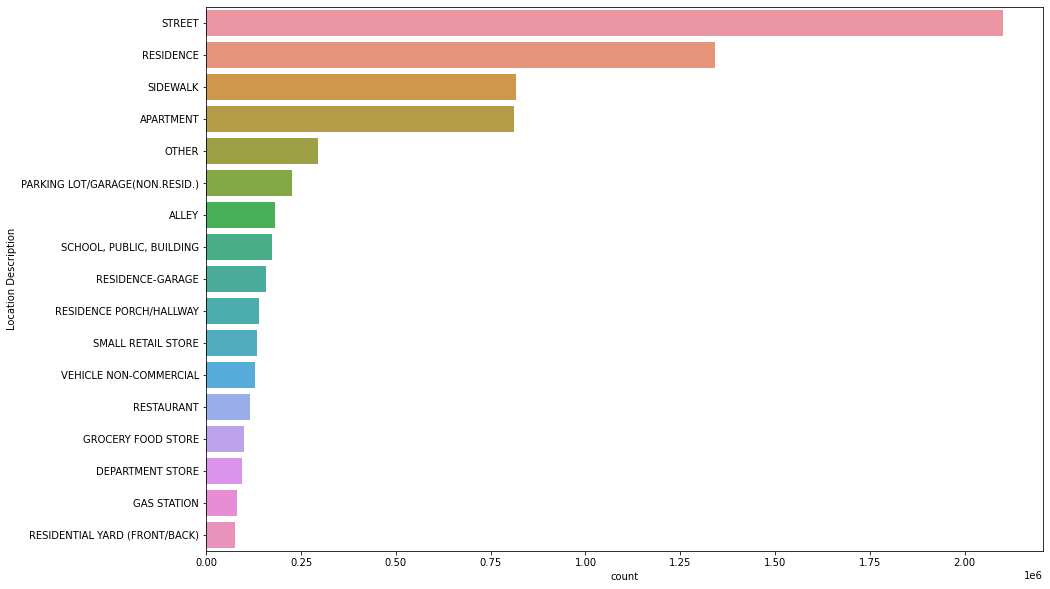

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(y= "Location Description", data = chicago_df, order = chicago_df["Location Description"].value_counts().iloc[:17].index)

In [18]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [19]:
chicago_df.resample("Y").size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

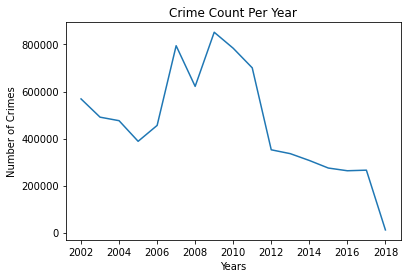

In [23]:
plt.plot(chicago_df.resample("Y").size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

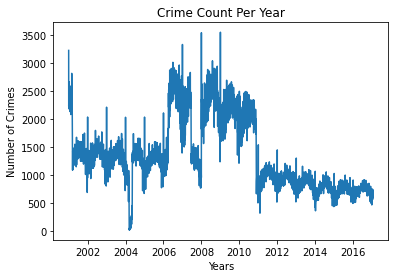

In [24]:
plt.plot(chicago_df.resample("D").size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

# STEP 3: PREPARING THE DATA

In [26]:
chicago_prophet = chicago_df.resample("M").size().reset_index()

In [27]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [29]:
chicago_prophet.columns = ["Date", "Crime Count"]

In [31]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [36]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {"Date": "ds", "Crime Count": "y"})

In [37]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


# STEP 4: MAKE PREDICTIONS

In [38]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [39]:
future = m.make_future_dataframe(periods = 365)
forcast = m.predict(future)

/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [40]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40562.858528,23225.950118,53164.127984,40562.858528,40562.858528,-1575.331442,-1575.331442,-1575.331442,-1575.331442,-1575.331442,-1575.331442,0.0,0.0,0.0,38987.527086
1,2001-02-28,40710.144493,18114.195687,49487.321084,40710.144493,40710.144493,-6454.597794,-6454.597794,-6454.597794,-6454.597794,-6454.597794,-6454.597794,0.0,0.0,0.0,34255.546699
2,2001-03-31,40873.211097,23757.101318,55164.678607,40873.211097,40873.211097,-2068.152964,-2068.152964,-2068.152964,-2068.152964,-2068.152964,-2068.152964,0.0,0.0,0.0,38805.058133
3,2001-04-30,41031.017488,23768.097173,55822.960723,41031.017488,41031.017488,-1473.265140,-1473.265140,-1473.265140,-1473.265140,-1473.265140,-1473.265140,0.0,0.0,0.0,39557.752348
4,2001-05-31,41194.084092,29535.392563,60721.376979,41194.084092,41194.084092,3883.216146,3883.216146,3883.216146,3883.216146,3883.216146,3883.216146,0.0,0.0,0.0,45077.300238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9125.185406,-9627.203813,22340.239082,8822.636840,9393.711873,-3425.150667,-3425.150667,-3425.150667,-3425.150667,-3425.150667,-3425.150667,0.0,0.0,0.0,5700.034739
554,2018-01-28,9111.198219,-10643.396010,23339.259142,8808.300124,9380.613648,-2771.435054,-2771.435054,-2771.435054,-2771.435054,-2771.435054,-2771.435054,0.0,0.0,0.0,6339.763165
555,2018-01-29,9097.211031,-8984.388099,23212.303262,8793.963407,9367.656011,-2233.841306,-2233.841306,-2233.841306,-2233.841306,-2233.841306,-2233.841306,0.0,0.0,0.0,6863.369725
556,2018-01-30,9083.223844,-8263.251693,23876.914290,8779.670545,9354.698374,-1837.854352,-1837.854352,-1837.854352,-1837.854352,-1837.854352,-1837.854352,0.0,0.0,0.0,7245.369491


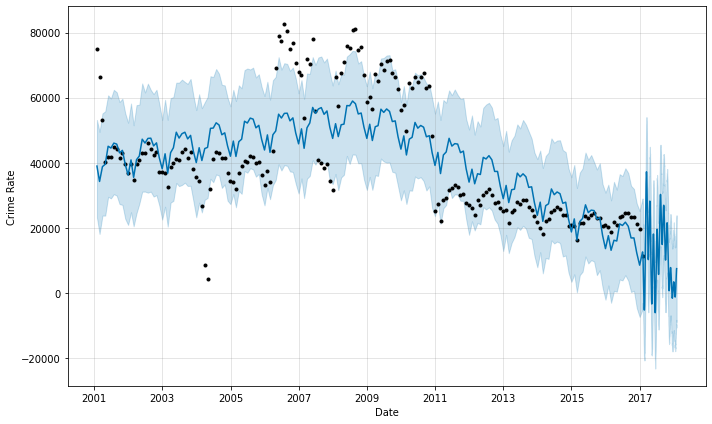

In [41]:
figure = m.plot(forcast, xlabel = 'Date', ylabel = "Crime Rate")

/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


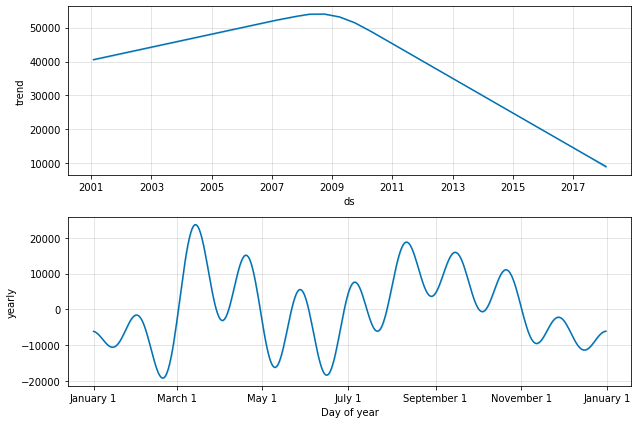

In [43]:
figure = m.plot_components(forcast)

In [46]:
future1 = m.make_future_dataframe(periods = 1000)
forcast1 = m.predict(future1)

/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


/Users/mac/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


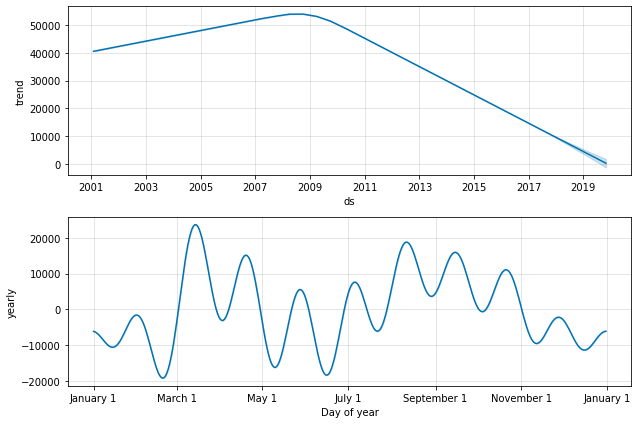

In [47]:
figure = m.plot_components(forcast1)